
<br>
    The objective of this exercise is that you analyse the code provided and<br>
    make the link with the course. You have to provide a short report that<br>
    comments and analyse the results. You can use directly the results or adapt<br>
    them to you needs.<br>


import the numerical library

In [1]:
import numpy as np
# import signal processing library
import scipy.signal as sp
# import ploting library
import pylab as py
py.ion()
py.close('all')

load the ecg signal

In [2]:
x = np.genfromtxt('respiration.dat')
# sampling frequency of the signal is 500 Hz
fs = 2
# generate correponding time vector
t = np.arange(len(x))/fs


 <br>
    The signal is a measurement of the breathing obtained by inductance<br>
    plethysmography.<br>
    The objective is to estimate the breathing frequency.<br>



 <br>
    The Hilbert transforms permits to estimate the instaneous amplitude and<br>
    phase of a narrow band signal. <br>
    Q: Comment the figures.<br>
    Q: Why the envelope does no follow the maxima of the signal<br>


compute the analytical signal of x (Hilbert transform)

In [3]:
xa = sp.hilbert(x)

plot the signal

Text(0.5, 1.0, 'Breathing signal')

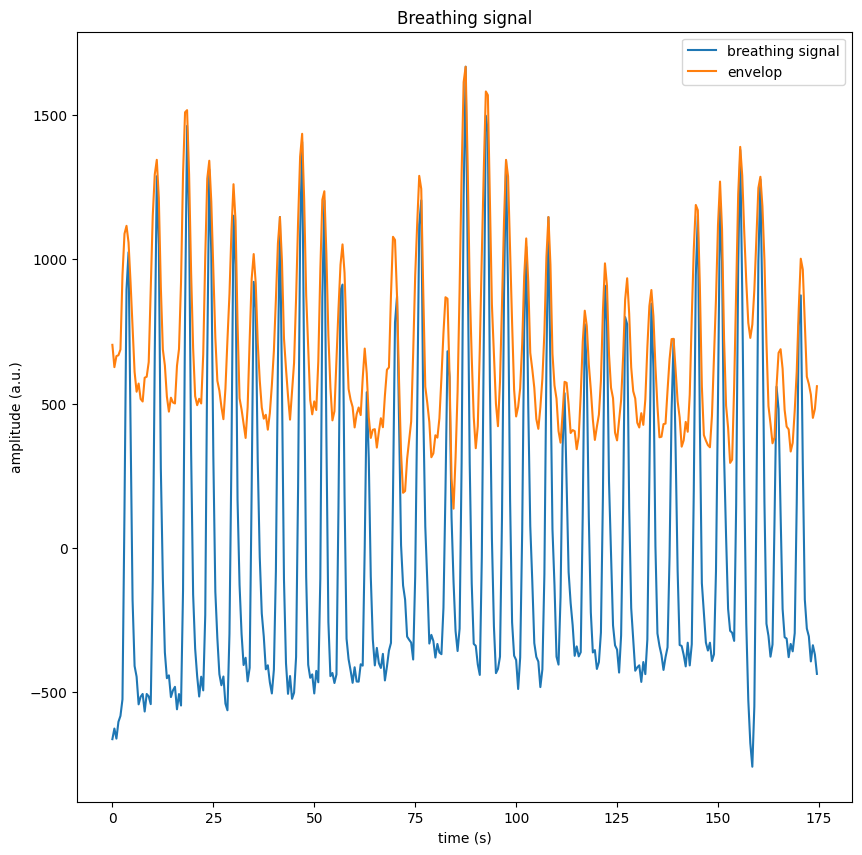

In [4]:
py.figure(1, figsize=[10,10])
py.clf()
py.plot(t, x, label='breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.legend(loc='upper right')
py.title('Breathing signal')

**Answer**

The signal is not narrow band. Consequently, the Hilbert transform does not produce a meaningful result, as it assumes the signal to be narrow band.
The envelope is not following the maxima for this exact reason; the Hilbert transform does not expect the signal to have a wide range of frequencies. 


<br>
    The raw breathing signal does not fullfil the requirement of narrow band.<br>
    The normal range of frequency for the breathing is within 0.1 to 0.25 Hz.<br>
    The signal is first filtered for this interval.<br>
    Q: Comment the figures<br>
    Q: How is the estimation of the amplitude envelope.<br>


Analogic limit of the passband frequency

In [5]:
f_pass = np.array([0.1, 0.25])
# Analogic limit of the stopband frequency
f_stop = np.array([0, 0.6])
# Convertion into Nyquist frequency
f_pass_N = f_pass/fs*2
f_stop_N = f_stop/fs*2
# Max attenutation in passband (dB)
g_pass = 3
# Min attenuation in stopband (dB)
g_stop = 40
# Determine the order and the cutoff frequency of a butterworth filter
ord, wn = sp.buttord(f_pass_N, f_stop_N, g_pass, g_stop)
# Compute the coeffcients of the filter
b, a = sp.butter(ord, wn, btype='band')
# Filter the signal
x_bp = sp.filtfilt(b ,a, x)

/usr/local/anaconda3/envs/ABSP/lib/python3.12/site-packages/scipy/signal/_filter_design.py:3868: RuntimeWarning: divide by zero encountered in divide
  nat = ((stopb ** 2 - passb[0] * passb[1]) /


Compute the Hilbert transform.

In [6]:
xa = sp.hilbert(x_bp)

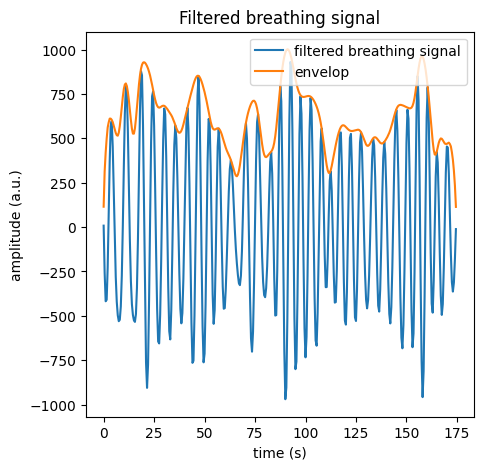

In [7]:
py.figure(2, figsize=[5,5])
py.clf()
py.plot(t, x_bp, label='filtered breathing signal')
py.plot(t, np.abs(xa), label='envelop')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Filtered breathing signal')
py.legend(loc='upper right')

**Answer** 

In this case, the filtered signal now fullfills the condition of being narrow band. Hence we see that the Hilbert transform is perfectly following the maxima of the filtered breathing signal, and the estimation of the amplitude envelope is accurate. 


<br>
    The angle of the Hilbert transform gives the instaneous phase of the signal.<br>
    Q: Comment the figure.<br>
    Q: What is the role of the unwrap function<br>


estimate the instantaneous phase from the Hilbert transform

In [8]:
phi_xa = np.angle(xa)
# phase is bounded between -pi and pi -> reconstruct continuous signal
phi_xa_unw = np.unwrap(phi_xa)

Text(0, 0.5, 'instantaneous phase unwrapped (rad)')

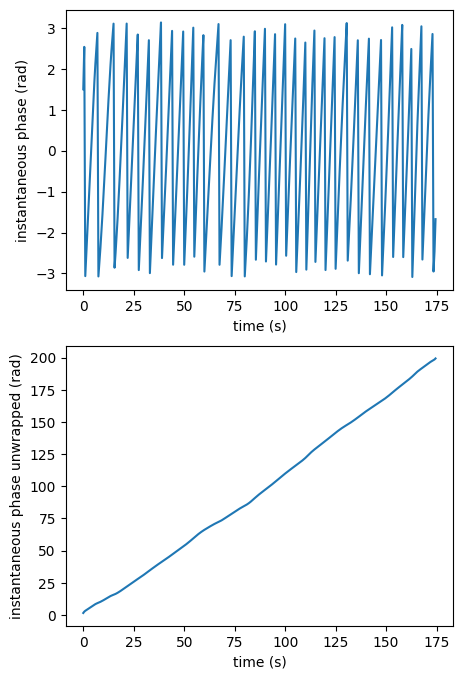

In [9]:
py.figure(3, figsize=[5, 8])
py.clf()
py.subplot(2,1,1)
py.plot(t, phi_xa)
py.xlabel('time (s)')
py.ylabel('instantaneous phase (rad)')
py.subplot(2,1,2)
py.plot(t, phi_xa_unw)
py.xlabel('time (s)')
py.ylabel('instantaneous phase unwrapped (rad)')

**Answer**

It is difficult to see in the first figure that the phase is steadily increasing because the phase is wrapped from $-\pi$ to $\pi$. The unwrapped function is used to extend the boundary of the phase beyond $[-\pi,+\pi]$, revealing the steady phase increase.


<br>
    The time derivate of the instaneous phase is the instaneous frequency of the<br>
    signal.<br>
    Q: Comment the figure.<br>
    Q: Compare the original waveform with the estimation of the breathing<br>
       frequency<br>


compute the derivative of the phase (angular frequency).

In [10]:
d_phi = np.diff(phi_xa_unw)
# convert angular frequency to frequency.
d_phi /= 2*np.pi
# convert digital frequency to analog frequency and in breathing per minute
# (bpm)
d_phi *= fs*60

Text(0, 0.5, 'breathing rate (bpm)')

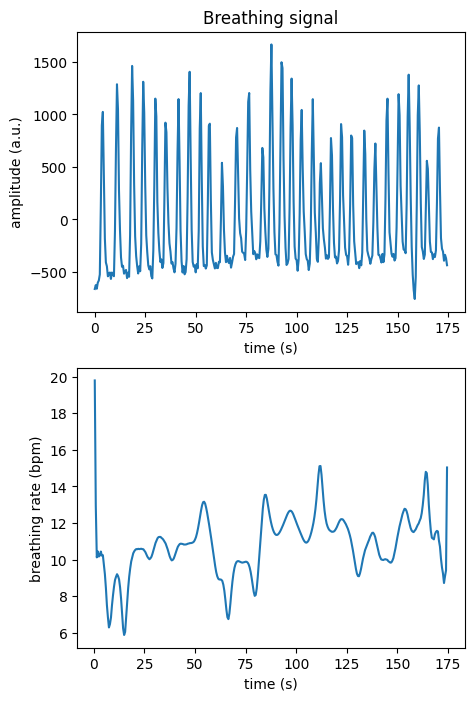

In [11]:
py.figure(4, figsize=[5,8])
py.clf()
py.subplot(2,1,1)
py.plot(t, x, label='breathing signal')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('Breathing signal')
py.subplot(2,1,2)
py.plot(t[1:], d_phi)
py.xlabel('time (s)')
py.ylabel('breathing rate (bpm)')

**Answer**

There are a lot of fluctuations (amplified by the numerical derivation), but by averaging the instantaneous frequency over a small interval we may get a good estimation of the breathing frequency.